In [112]:
# Simulate MCMC model data: pick the true parameter variables from the model's prior distribution.
import numpy as np
import numpy.matlib
import matplotlib.pyplot as plt
from scipy.stats import invgamma
from numpy.linalg import norm

In [158]:
# Number of persons.
P = 100
# Number of items.
I = 10
# Number of latent ability dimensions (sub-scales).
C = 5

In [159]:
# Generate latent ability distribution variances.
alpha_theta, beta_theta = 1, 1
rv = invgamma(a=alpha_theta, scale=beta_theta)
v = rv.rvs(C)
print(v)

[ 0.66374164  4.90478021 28.2143475   3.72237548  1.24491698]


(100, 5)


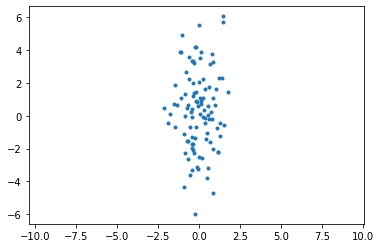

In [160]:
# Generate normally distributed student latent abilities.
cov = np.diag(v)
theta = np.random.multivariate_normal(np.zeros((C,)), cov, P)
print(theta.shape)
plt.plot(theta[:,0], theta[:,1], '.')
plt.axis('equal')
plt.show()

In [175]:
# Generate item difficulty parameters.
# Discrimination is uniform[0.5, 1.5].
a = np.random.random(size=(I,)) + 0.5
# Difficulty is equally spaced from -3 to 3.
b = np.linspace(-3, 3, num=I)
# Item i measures sub-scale c[i]. Select about the same number of items per subscale,
# then randomly permute the item order.
c = np.random.permutation(np.matlib.repmat(np.arange(C, dtype=int), int(np.ceil(I/C)), 1).ravel()[:I])
# Asymptote pi is fixed.
asym = 0.2
print(a)
print(b)
print(c)

[0.55751878 0.9647691  1.19612653 0.57174155 1.29186741 0.70285498
 0.92424375 0.90557967 0.88273807 1.25009451]
[-3.         -2.33333333 -1.66666667 -1.         -0.33333333  0.33333333
  1.          1.66666667  2.33333333  3.        ]
[3 0 4 0 2 1 1 3 4 2]


In [176]:
# Generate item responses (the observed data).
t = np.exp(-a*(theta[:,c] - b))
p_correct = asym + (1-asym)*(t/(1+t))
X = np.random.binomial(1, p=p_correct)

In [183]:
# Initial guess for theta_p^c: fraction of correct responses of person p to items measuring
# sub-scale c.
theta_init = np.array([np.mean(X[:, np.where(c == d)[0]], axis=1) for d in range(C)])

In [174]:
int(np.ceil(I/C))

2